In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import silhouette_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [2]:
data = pd.read_csv('Mall_Customers.csv')

df = data.copy()
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df = df.drop(['CustomerID'], axis=1)

In [5]:
df.isna().sum()

Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df = df.rename(columns={'Genre': 'Gender'})
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [7]:
label = LabelEncoder()
df['Gender'] = label.fit_transform(df['Gender'])

In [8]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [9]:
df.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.440000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,0.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


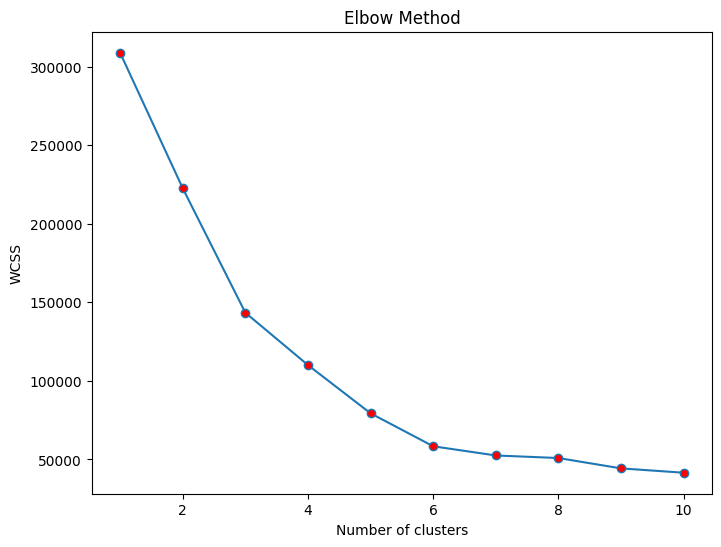

In [10]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=10)
    kmeans.fit_predict(df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1,11), wcss, marker='o', markerfacecolor='red')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

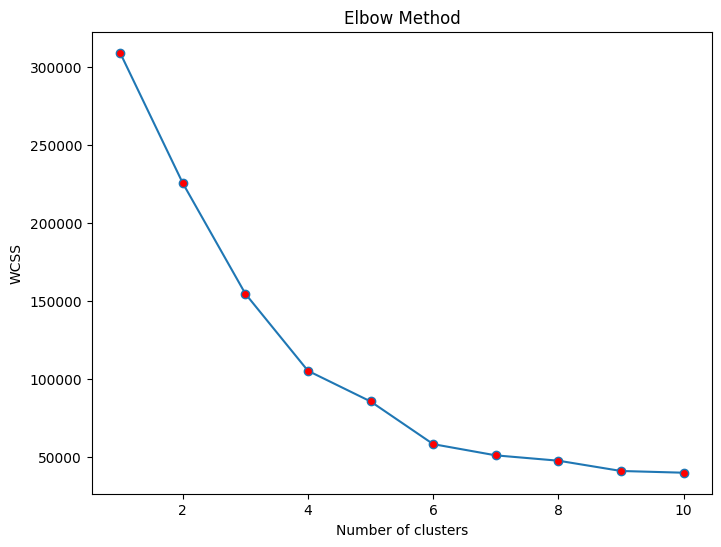

In [11]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=100)
    kmeans.fit_predict(df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1,11), wcss, marker='o', markerfacecolor='red')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [18]:
kmeans = KMeans(n_clusters=4, random_state=100)
label1 = kmeans.fit_predict(df)
label1
df['Clusters'] = label1

In [19]:
print(f"Silhouette score: {silhouette_score(df, label1)}")

Silhouette score: 0.39257058330217853


In [20]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,19,15,39,1
1,1,21,15,81,1
2,0,20,16,6,0
3,0,23,16,77,1
4,0,31,17,40,1
...,...,...,...,...,...
195,0,35,120,79,3
196,0,45,126,28,2
197,1,32,126,74,3
198,1,32,137,18,2


In [21]:
df.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.440000,38.850000,60.560000,50.200000,1.245000
std,0.497633,13.969007,26.264721,25.823522,1.131981
min,0.000000,18.000000,15.000000,1.000000,0.000000
25%,0.000000,28.750000,41.500000,34.750000,0.000000
50%,0.000000,36.000000,61.500000,50.000000,1.000000
75%,1.000000,49.000000,78.000000,73.000000,2.000000
max,1.000000,70.000000,137.000000,99.000000,3.000000


In [28]:
df.Clusters.value_counts()

Clusters
0    69
1    53
3    40
2    38
Name: count, dtype: int64

In [29]:
df['Annual Income (k$)'].value_counts()

Annual Income (k$)
54     12
78     12
60      6
48      6
63      6
       ..
101     2
113     2
120     2
126     2
137     2
Name: count, Length: 64, dtype: int64

In [30]:
df.groupby(['Clusters'], as_index=False)[['Age', 'Annual Income (k$)','Spending Score (1-100)']].mean()

,Clusters,Age,Annual Income (k$),Spending Score (1-100)
0,0,52.057971,46.420290,39.884058
1,1,25.056604,40.735849,62.622642
2,2,40.394737,87.000000,18.631579
3,3,32.875000,86.100000,81.525000


In [31]:
X = df.loc[:, ['Age', 'Annual Income (k$)','Spending Score (1-100)']]
Y = df.iloc[:, -1]

In [33]:
df1 = pd.DataFrame(new_df, columns=X.columns)
df1

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


In [39]:
X_train, X_test, y_train, y_test = train_test_split(df1, Y, test_size=0.3, random_state=42)
model = XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print('\n')
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        20
           1       1.00      0.93      0.97        15
           2       1.00      1.00      1.00        15
           3       1.00      1.00      1.00        10

    accuracy                           0.98        60
   macro avg       0.99      0.98      0.99        60
weighted avg       0.98      0.98      0.98        60



[[20  0  0  0]
 [ 1 14  0  0]
 [ 0  0 15  0]
 [ 0  0  0 10]]


In [42]:
import pickle

file = 'XGBModel.pkl' 
with open(file, 'wb') as f:
    pickle.dump(model, f)

In [41]:
with open('XGBModel.pkl', 'rb') as f:
    model = pickle.load(f)

print(model)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)
